In [149]:
import pandas as pd
import numpy as np
import joblib
import sklearn
import gradio as gr

In [150]:
import tensorflow as tf

In [151]:
import face_recognition

In [152]:
# from cassandra.cluster import Cluster
# from cassandra.auth import PlainTextAuthProvider

# cloud_config= {
#   'secure_connect_bundle': r'C:\Users\ROCKRAM\Downloads\secure-connect-sample.zip'
# }
# auth_provider = PlainTextAuthProvider('WZnAUhYtZZCrGJbMRAsWaNUO', 'AoGWhtEbRLx89e+QwIa0qUd,y_AAdyl_8KkJv1Uguc+etLhArJgZg+3_tSkHSdD--s2PMAPoZna7ALlHC2pH_7aI+P9ddSe375qFbKjvFqhabfHW5tY3H5g8wz_tL76A')
# cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
# session = cluster.connect()

# row = session.execute("select release_version from system.local").one()
# if row:
#   print(row[0])
# else:
#   print("An error occurred.")

# query = "SELECT * FROM csv.bmidataset"
# df = pd.DataFrame(list(session.execute(query)))

In [153]:
df=pd.read_csv('bmi data set.csv')

In [154]:
from pathlib import Path as p

In [155]:
def get_index_of_digit(string):
    import re
    match = re.search("\d", p(string).stem)
    return match.start(0)

In [156]:
data_folder = "sample_faces"

In [157]:
from glob import glob
all_files = glob(data_folder+"/*")

all_jpgs = sorted([img for img in all_files if ".jpg" in img or ".jpeg" in img or "JPG" in img])

print("Total {} photos ".format(len(all_jpgs)))

Total 254 photos 


In [158]:
id_path = [(p(images).stem[:(get_index_of_digit(p(images).stem))],images) for  images in all_jpgs ]

In [159]:
img_df = pd.DataFrame(id_path,columns=['UID','path'])

In [160]:
data_df = img_df.merge(df)

In [161]:
data_df

,UID,path,id,name,height,weight,BMI
0,ak,sample_faces\ak1.jpg,25,Thala Ajith kumar,175.00,80,26.100000
1,ak,sample_faces\ak10.jpg,25,Thala Ajith kumar,175.00,80,26.100000
2,ak,sample_faces\ak2.jpg,25,Thala Ajith kumar,175.00,80,26.100000
3,ak,sample_faces\ak3.jpg,25,Thala Ajith kumar,175.00,80,26.100000
4,ak,sample_faces\ak4.jpg,25,Thala Ajith kumar,175.00,80,26.100000
...,...,...,...,...,...,...,...
249,vikky,sample_faces\vikky5.jpg,8,vicky kaushal,1.83,80,23.888441
250,vikky,sample_faces\vikky6.jpg,8,vicky kaushal,1.83,80,23.888441
251,vikky,sample_faces\vikky7.jpg,8,vicky kaushal,1.83,80,23.888441
252,vikky,sample_faces\vikky8.jpg,8,vicky kaushal,1.83,80,23.888441


In [162]:
# def get_face_encoding(img_path):
#     print(img_path)
#     picture_of_me = face_recognition.load_image_file(img_path)
#     my_face_encoding = face_recognition.face_encodings(picture_of_me)
#     if not my_face_encoding:
#         print("no face found !!!")
#         return np.zeros(128).tolist()
#     return my_face_encoding[0].tolist()

In [163]:
#import cv2

In [164]:
# import cv2
# import face_recognition
# import numpy as np

# def get_face_encoding(img_path):
#     # read the image file
#     img = cv2.imread(img_path)

#     # convert the image array to RGB format
#     img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#     # find all the faces in the image
#     face_locations = face_recognition.face_locations(img_rgb)
#     if not face_locations:
#         print("no face found !!!")
#         return np.zeros(128)

#     # extract the face encoding
#     face_encoding = face_recognition.face_encodings(img_rgb, face_locations)[0]
#     return face_encoding


In [165]:
def get_face_encoding(image_path):
    print(image_path)
    picture_of_me = face_recognition.load_image_file(image_path)
    my_face_encoding = face_recognition.face_encodings(picture_of_me)
    if not my_face_encoding:
        print("no face found !!!")
        return np.zeros(128).tolist()
    return my_face_encoding[0].tolist()

In [166]:
tot_faces = []

In [167]:
for images in data_df.path:
    face_enc = get_face_encoding(images)
    tot_faces.append(face_enc)

sample_faces\ak1.jpg
sample_faces\ak10.jpg
sample_faces\ak2.jpg
sample_faces\ak3.jpg
sample_faces\ak4.jpg
no face found !!!
sample_faces\ak5.jpg
sample_faces\ak6.jpg
sample_faces\ak7.jpg
no face found !!!
sample_faces\ak8.jpg
sample_faces\ak9.jpg
no face found !!!
sample_faces\akshay1.jpeg
sample_faces\akshay10.jpg
sample_faces\akshay11.jpg
sample_faces\akshay12.jpg
sample_faces\akshay13.jpg
sample_faces\akshay14.jpg
sample_faces\akshay15.jpg
sample_faces\akshay16.jpg
sample_faces\akshay17.jpg
sample_faces\akshay18.jpg
sample_faces\akshay19.jpg
sample_faces\akshay2.jpeg
no face found !!!
sample_faces\akshay20.jpg
sample_faces\akshay3.jpg
sample_faces\akshay4.jpg
sample_faces\akshay5.jpg
sample_faces\akshay6.jpg
sample_faces\akshay7.jpg
sample_faces\akshay8.jpg
sample_faces\akshay9.jpg
sample_faces\amir1.jpg
sample_faces\amir10.jpg
sample_faces\amir11.jpg
sample_faces\amir12.jpg
sample_faces\amir13.jpg
sample_faces\amir14.jpeg
sample_faces\amir15.jpg
sample_faces\amir2.jpg
sample_faces\

In [168]:
X = np.array(tot_faces)

In [169]:
y_height = data_df.height.values
y_weight = data_df.weight.values
y_BMI = data_df.BMI.values

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test ,y_BMI_train, y_BMI_test = train_test_split(X, y_height,y_weight,y_BMI, random_state=1)

Converting the data Type into float

In [172]:
y_height_train=y_height_train.astype(float)
y_height_test=y_height_test.astype(float)
y_weight_train=y_weight_train.astype(float)
y_weight_test=y_weight_test.astype(float)
y_BMI_train=y_BMI_train.astype(float)
y_BMI_test=y_BMI_test.astype(float)

getting the shape of the Training data

In [173]:
print(X_train.shape)

(190, 128)


Train the model using CNN

Developing height model

In [193]:
# Define the model architecture
model_height = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5)
])

model_height.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Fit the model to the training data
model_height.fit(X_train, np.log(y_height_train), epochs=10, batch_size=32)

# Evaluate the model on the test data
test_loss_height_cnn,test_height_accuray = model_height.evaluate(X_test, np.log(y_height_test))

#printing the metrics
print('loss of Height:', test_loss_height_cnn)
print('mae of Height:', test_height_accuray)

#saving the model
model_height.save('height_model.h5')

Epoch 1/10
6/6 [==============================] - 6s 43ms/step - loss: 1.2672 - mae: 0.5980
Epoch 2/10
6/6 [==============================] - 0s 30ms/step - loss: 1.1606 - mae: 0.6070
Epoch 3/10
6/6 [==============================] - 0s 31ms/step - loss: 1.0915 - mae: 0.5826
Epoch 4/10
6/6 [==============================] - 0s 35ms/step - loss: 1.0994 - mae: 0.5439
Epoch 5/10
6/6 [==============================] - 0s 39ms/step - loss: 1.2135 - mae: 0.4859
Epoch 6/10
6/6 [==============================] - 0s 32ms/step - loss: 1.1992 - mae: 0.5171
Epoch 7/10
6/6 [==============================] - 0s 41ms/step - loss: 1.0972 - mae: 0.5464
Epoch 8/10
6/6 [==============================] - 0s 42ms/step - loss: 1.1366 - mae: 0.5663
Epoch 9/10
6/6 [==============================] - 0s 34ms/step - loss: 1.1445 - mae: 0.5613
Epoch 10/10
2/2 [==============================] - 2s 18ms/step - loss: 0.7319 - mae: 0.3531
loss of Height: 0.731899619102478
mae of Height: 0.3531155586242676


Developing weight model

In [194]:
# Define the model architecture
model_weight = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
    ])
model_weight.compile(loss='mse', optimizer='adam',metrics=['mae'])

# Fit the model to the training data
model_weight.fit(X_train, np.log(y_weight_train), epochs=10, batch_size=32)

# Evaluate the model on the test data
test_loss_weight_cnn,test_weight_accuray = model_weight.evaluate(X_test, np.log(y_weight_test))

#printing the metrics
print('loss of weight:', test_loss_weight_cnn)
print('mae of weight:', test_weight_accuray)

#saving the model
model_weight.save('weight_model.h5')


Epoch 1/10
6/6 [==============================] - 6s 84ms/step - loss: 13.3965 - mae: 3.6208
Epoch 2/10
6/6 [==============================] - 0s 84ms/step - loss: 2.5016 - mae: 1.4212
Epoch 3/10
6/6 [==============================] - 0s 80ms/step - loss: 0.8856 - mae: 0.7662
Epoch 4/10
6/6 [==============================] - 0s 89ms/step - loss: 1.1568 - mae: 0.9942
Epoch 5/10
6/6 [==============================] - 1s 89ms/step - loss: 0.3775 - mae: 0.4484
Epoch 6/10
6/6 [==============================] - 0s 76ms/step - loss: 0.3817 - mae: 0.4455
Epoch 7/10
6/6 [==============================] - 0s 76ms/step - loss: 0.3211 - mae: 0.4038
Epoch 8/10
6/6 [==============================] - 1s 82ms/step - loss: 0.2207 - mae: 0.2813
Epoch 9/10
6/6 [==============================] - 1s 83ms/step - loss: 0.2138 - mae: 0.2625
Epoch 10/10
2/2 [==============================] - 1s 23ms/step - loss: 0.2288 - mae: 0.2111
loss of weight: 0.22877739369869232
mae of weight: 0.21105632185935974


Developing BMI model

In [195]:
# Define the model architecture
model_BMI = tf.keras.Sequential([
    tf.keras.layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
])
model_BMI.compile(loss='mse', optimizer='adam',metrics=['mae'])


# Fit the model to the training data
model_BMI.fit(X_train, np.log(y_BMI_train), epochs=10, batch_size=32)


# Evaluate the model on the test data
test_loss_BMI_cnn,test_BMI_accuray = model_BMI.evaluate(X_test, np.log(y_BMI_test))

#printing the metrics
print('loss of BMI:', test_loss_BMI_cnn)
print('mae of BMI:', test_BMI_accuray)

#saving the model
model_BMI.save('BMI_model.h5')

Epoch 1/10
6/6 [==============================] - 4s 37ms/step - loss: 7.4268 - mae: 2.6965
Epoch 2/10
6/6 [==============================] - 0s 40ms/step - loss: 1.2128 - mae: 0.9515
Epoch 3/10
6/6 [==============================] - 0s 38ms/step - loss: 0.8786 - mae: 0.7865
Epoch 4/10
6/6 [==============================] - 0s 45ms/step - loss: 0.4658 - mae: 0.5877
Epoch 5/10
6/6 [==============================] - 0s 62ms/step - loss: 0.3051 - mae: 0.4161
Epoch 6/10
6/6 [==============================] - 0s 82ms/step - loss: 0.2411 - mae: 0.3800
Epoch 7/10
6/6 [==============================] - 0s 65ms/step - loss: 0.1518 - mae: 0.2191
Epoch 8/10
6/6 [==============================] - 0s 55ms/step - loss: 0.1696 - mae: 0.2759
Epoch 9/10
6/6 [==============================] - 0s 39ms/step - loss: 0.1230 - mae: 0.1700
Epoch 10/10
2/2 [==============================] - 1s 15ms/step - loss: 0.1491 - mae: 0.1463
loss of BMI: 0.14909550547599792
mae of BMI: 0.14634348452091217


saving the models

In [196]:
#;oad the models

height_model = tf.keras.models.load_model('height_model.h5')
weight_model = tf.keras.models.load_model('weight_model.h5')
BMI_model = tf.keras.models.load_model('BMI_model.h5')

def predict_heit_width_BMI(input_img,height_model,weight_model,BMI_model):
    test_array = np.expand_dims(np.array(get_face_encoding(input_img)),axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = np.ndarray.item(np.exp(BMI_model.predict(test_array)))
    return {'height':height,"weight":weight,"bmi":bmi}

for code level deployment

In [197]:
from IPython.display import Image

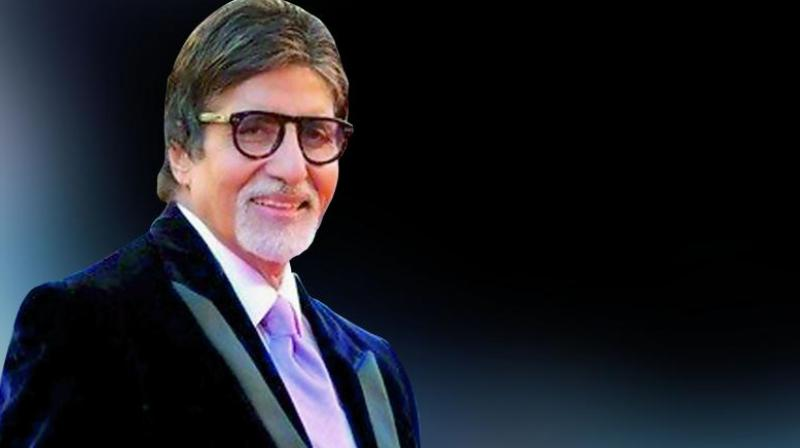

In [198]:
input_img = r"C:\Users\ROCKRAM\Downloads\Face-to-height-weight-BMI-estimation--master\Face-to-height-weight-BMI-estimation--master\bmi project\test_faces\amit2.jpg"
Image(input_img)

In [199]:
print((input_img))

C:\Users\ROCKRAM\Downloads\Face-to-height-weight-BMI-estimation--master\Face-to-height-weight-BMI-estimation--master\bmi project\test_faces\amit2.jpg


In [200]:
predict_heit_width_BMI(input_img,height_model,weight_model,BMI_model)

C:\Users\ROCKRAM\Downloads\Face-to-height-weight-BMI-estimation--master\Face-to-height-weight-BMI-estimation--master\bmi project\test_faces\amit2.jpg
1/1 [==============================] - 1s 515ms/step


{'height': 1.319846749305725,
 'weight': 68.66764831542969,
 'bmi': 23.72263526916504}

creating GUI using tkinter

In [202]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image
import numpy as np
import cv2

# Define the function to predict height, weight, and BMI
def predict_heit_width_BMI(input_img,height_model,weight_model,BMI_model):
    test_array = np.expand_dims(np.array(get_face_encoding(input_img)),axis=0)
    height = np.ndarray.item(np.exp(height_model.predict(test_array)))
    weight = np.ndarray.item(np.exp(weight_model.predict(test_array)))
    bmi = np.ndarray.item(np.exp(BMI_model.predict(test_array)))
    return {'height':height,"weight":weight,"bmi":bmi}

# Define a function to get the file path of the selected image
def browse_file():
    global photo # Add this line to access the global variable
    file_path = filedialog.askopenfilename()
    if file_path:
        # Open the selected image and display it in the UI
        image = Image.open(file_path)
        image = image.resize((300, 300), Image.ANTIALIAS)
        photo = ImageTk.PhotoImage(image)
        canvas.itemconfigure(image_id, image=photo)
        canvas.image = photo

        # Call the predict_heit_width_BMI() function and display the results in the UI
        result = predict_heit_width_BMI(file_path, height_model, weight_model, BMI_model)
        result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")

def capture_image():
    global photo # Add this line to access the global variable
    cap = cv2.VideoCapture(0)
    cap.set(3,640) # set Width
    cap.set(4,480) # set Height
    while(True):
        ret, frame = cap.read()
        if ret:
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                # Save the captured image and display it in the UI
                cv2.imwrite('captured_image.jpg', frame)
                image = Image.open('captured_image.jpg')
                image = image.resize((300, 300), Image.ANTIALIAS)
                photo = ImageTk.PhotoImage(image)
                canvas.itemconfigure(image_id, image=photo)
                canvas.image = photo

                # Call the predict_heit_width_BMI() function and display the results in the UI
                result = predict_heit_width_BMI('captured_image.jpg', height_model, weight_model, BMI_model)
                result_label.config(text=f"Height: {result['height']:.2f}\nWeight: {result['weight']:.2f}\nBMI: {result['bmi']:.2f}")
                break
    cap.release()
    cv2.destroyAllWindows()

# Define a function to clear the selected image and results
def clear_display():
    global photo # Add this line to access the global variable
    canvas.delete(image_id)
    result_label.config(text="")
    photo = None # Set the global variable to None to allow the PhotoImage object to be garbage collected

# Create the main window
root = tk.Tk()
root.title("Predict Height, Weight, and BMI")

# Create the canvas to display the image
canvas = tk.Canvas(root, width=300, height=300)
canvas.pack()

# Create a label to display the results
result_label = tk.Label(root, font=("Arial", 14))
result_label.pack(pady=10)

# Create a label to display the results
result_label = tk.Label(root, font=("Arial", 14))
result_label.pack(pady=10)

# Create a frame for the buttons
button_frame = tk.Frame(root)
button_frame.pack(pady=10)

# Create a button to browse for an image
browse_button = tk.Button(button_frame, text="Browse", command=browse_file)
browse_button.pack(side=tk.LEFT, padx=10)

# Create a button to capture image from the camera
capture_button = tk.Button(button_frame, text="Capture", command=capture_image)
capture_button.pack(side=tk.LEFT, padx=10)

# Create a button to clear the displayed image and results
clear_button = tk.Button(button_frame, text="Clear", command=clear_display)
clear_button.pack(side=tk.RIGHT, padx=10)

# Initialize the image_id variable
image_id = canvas.create_image((0, 0), anchor='nw')

# Load the height, weight, and BMI models
height_model = tf.keras.models.load_model('height_model.h5')
weight_model = tf.keras.models.load_model('weight_model.h5')
BMI_model = tf.keras.models.load_model('BMI_model.h5')

# Start the main loop
root.mainloop()



C:\Users\ROCKRAM\AppData\Local\Temp\ipykernel_11808\290438976.py:44: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((300, 300), Image.ANTIALIAS)


captured_image.jpg
1/1 [==============================] - 0s 443ms/step
captured_image.jpg
no face found !!!
1/1 [==============================] - 0s 150ms/step
